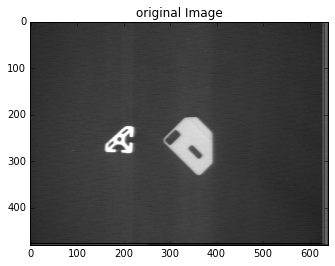

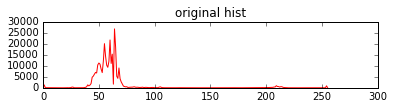

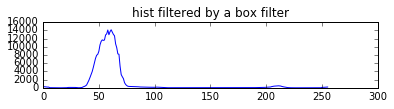

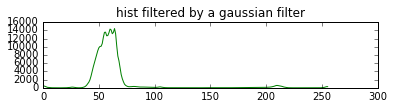

The threshold searching is based on the box filter result of the histgram
The 1  peak detection result when the detection threshold is equal to  14143 :


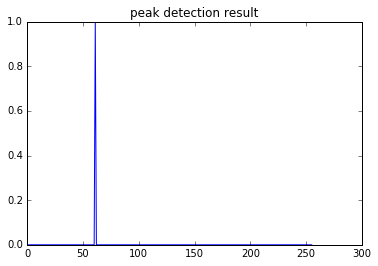

The 2  peak detection result when the detection threshold is equal to  7071.5 :


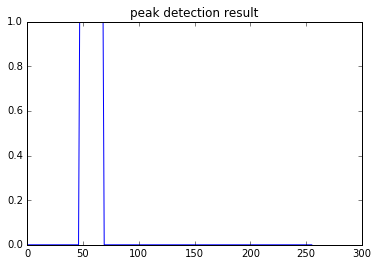

The 3  peak detection result when the detection threshold is equal to  3535.75 :


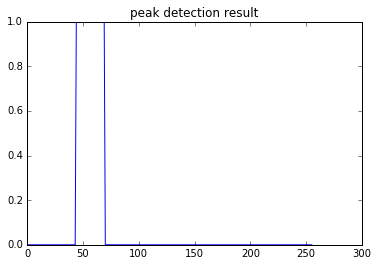

The 4  peak detection result when the detection threshold is equal to  1767.875 :


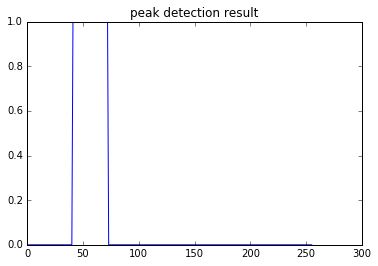

The 5  peak detection result when the detection threshold is equal to  883.9375 :


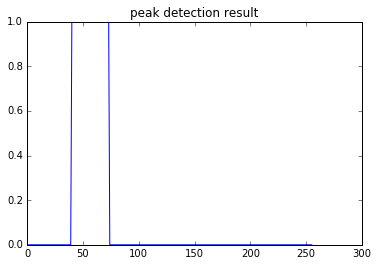

The 6  peak detection result when the detection threshold is equal to  441.96875 :


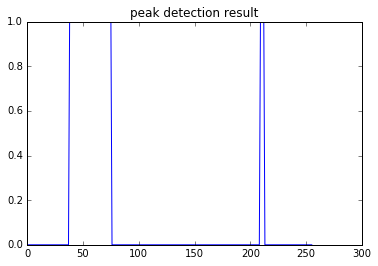

The searched threshold for the binary image is:  115.9


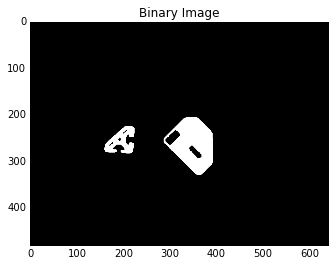

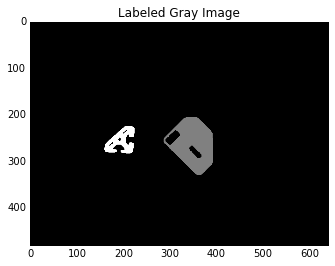

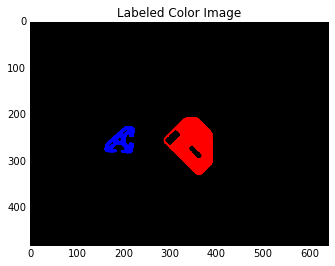

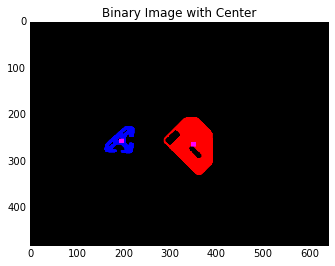

Data Base:
Label: 0 Area: 7885.0 Center:( 263.65047558655675 , 263.65047558655675 ) Orientation: 26.565051177077994
Label: 1 Area: 2169.0 Center:( 256.7132319041033 , 256.7132319041033 ) Orientation: 135.0


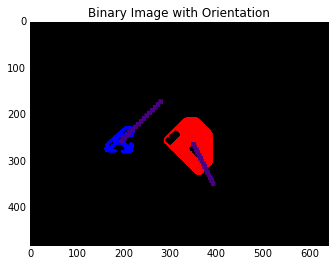

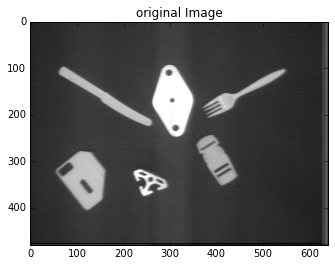

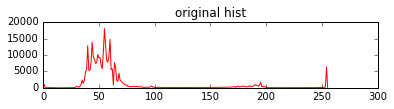

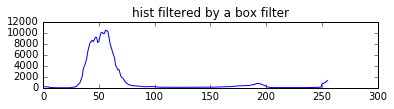

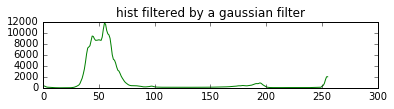

The threshold searching is based on the box filter result of the histgram
The 1  peak detection result when the detection threshold is equal to  10534 :


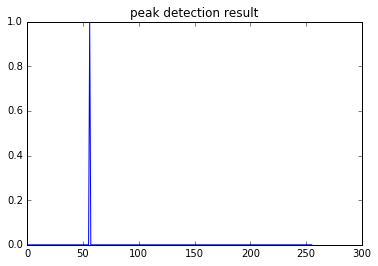

The 2  peak detection result when the detection threshold is equal to  5267.0 :


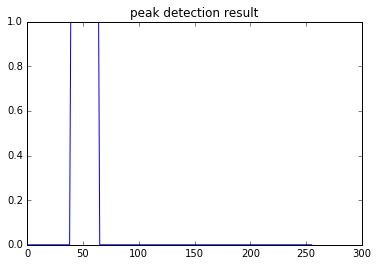

The 3  peak detection result when the detection threshold is equal to  2633.5 :


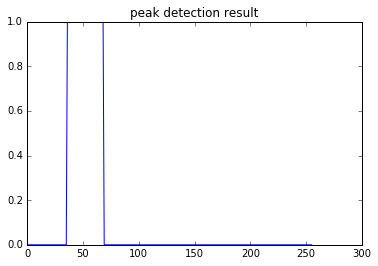

The 4  peak detection result when the detection threshold is equal to  1316.75 :


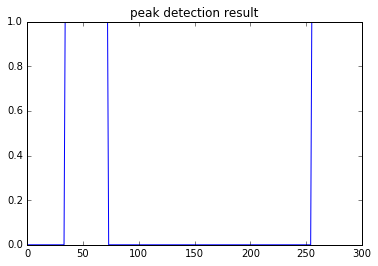

The searched threshold for the binary image is:  127.6


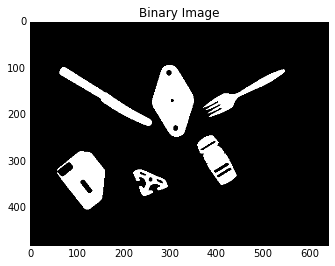

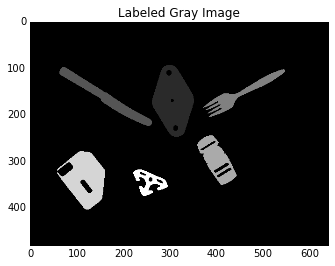

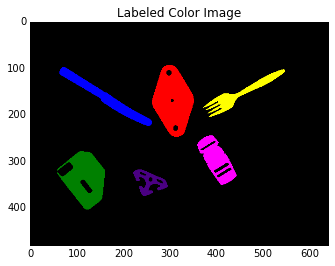

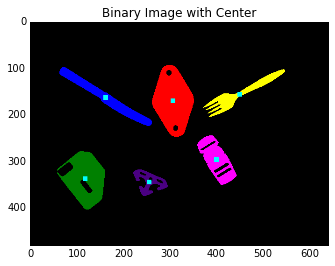

Data Base:
Label: 0 Area: 9009.0 Center:( 170.56232656232658 , 170.56232656232658 ) Orientation: 0.0
Label: 1 Area: 4224.0 Center:( 163.5201231060606 , 163.5201231060606 ) Orientation: 63.43494882292202
Label: 2 Area: 3275.0 Center:( 156.30687022900764 , 156.30687022900764 ) Orientation: 116.56505117707798
Label: 3 Area: 4043.0 Center:( 296.22038090526837 , 296.22038090526837 ) Orientation: 26.565051177077994
Label: 4 Area: 7443.0 Center:( 337.63469031304584 , 337.63469031304584 ) Orientation: 0.0
Label: 5 Area: 1806.0 Center:( 344.23532668881506 , 344.23532668881506 ) Orientation: 63.43494882292202


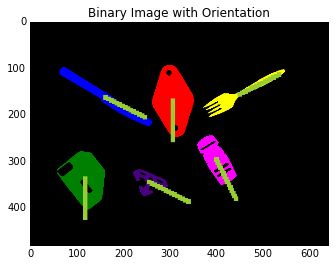

Object recongization reslut:
the object in the tested picture with the label  0  is the same as the object in the training data base with thelabel 0
the object in the tested picture with the label  1  is not found from the data base.
the object in the tested picture with the label  2  is not found from the data base.
the object in the tested picture with the label  3  is not found from the data base.
the object in the tested picture with the label  4  is the same as the object in the training data base with thelabel 0
the object in the tested picture with the label  5  is not found from the data base.


In [5]:
'''This part if related to the Program 1 of the HW2. The main algorithms here is searching a threshold for the 
converting the grey level photo into the binary photo.

Peak detection of Box/Gaussian filtered histrogram is used here to get a reasonable threshold. The genral idea is:
1. Detect top two peaks from the histrogram;
2. In the detected top two peaks, one is supposed to the background pixel and the other one is supposed to the 
meanful picture pixel;
3. The threshold is chosen as the middle of the detected top two peaks. '''
import re
import numpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from skimage.color.colorlabel import label2rgb
from math import sqrt
import math
%matplotlib inline
# read pgm file
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return numpy.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=58
                            ).reshape((int(height), int(width)))



'''The histogram is filtered by the Box/Gaussian filter:
if gaussian_filter is True then the gaussian filter is used else the box filter will be used'''
def filter_function(hist,gaussian_filter):
    hist_filter=hist.copy()
    if gaussian_filter:
        filter_weight=[0.03,0.05,0.1,0.195,0.25,0.195,0.1,0.05,0.03]
        #print ('gaussian filter is used')
    else:
        filter_weight=[1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0,1/9.0]
        #print ('box filter is used')   
    #sum of the last 5 elements of the filter weight. This value is used to handle the boundary case
    sum_last_5_of_fw=filter_weight[4]+filter_weight[5]+filter_weight[6]+filter_weight[7]+filter_weight[8]
    sum_last_6_of_fw=filter_weight[3]+sum_last_5_of_fw
    sum_last_7_of_fw=filter_weight[2]+sum_last_6_of_fw
    sum_last_8_of_fw=filter_weight[1]+sum_last_7_of_fw
   
    hist_filter[0]=(hist[0]*filter_weight[4]+hist[1]*filter_weight[5]+hist[2]*filter_weight[6]+hist[3]*filter_weight[7]+hist[4]*filter_weight[8])*(1.0/sum_last_5_of_fw)
    hist_filter[1]=(hist[0]*filter_weight[3]+hist[1]*filter_weight[4]+hist[2]*filter_weight[5]+hist[3]*filter_weight[6]+hist[4]*filter_weight[7]+hist[5]*filter_weight[8])*(1.0/sum_last_6_of_fw)
    hist_filter[2]=(hist[0]*filter_weight[2]+hist[1]*filter_weight[3]+hist[2]*filter_weight[4]+hist[3]*filter_weight[5]+hist[4]*filter_weight[6]+hist[5]*filter_weight[7]+hist[6]*filter_weight[8])*(1.0/sum_last_7_of_fw)
    hist_filter[3]=(hist[0]*filter_weight[1]+hist[1]*filter_weight[2]+hist[2]*filter_weight[3]+hist[3]*filter_weight[4]+hist[4]*filter_weight[5]+hist[5]*filter_weight[6]+hist[6]*filter_weight[7]+hist[7]*filter_weight[8])*(1.0/sum_last_8_of_fw)
    
    hist_filter[255-0]=(hist[255-0]*filter_weight[4]+hist[255-1]*filter_weight[5]+hist[255-2]*filter_weight[6]+hist[255-3]*filter_weight[7]+hist[255-4]*filter_weight[8])*(1.0/sum_last_5_of_fw)
    hist_filter[255-1]=(hist[255-0]*filter_weight[3]+hist[255-1]*filter_weight[4]+hist[255-2]*filter_weight[5]+hist[255-3]*filter_weight[6]+hist[255-4]*filter_weight[7]+hist[255-5]*filter_weight[8])*(1.0/sum_last_6_of_fw)
    hist_filter[255-2]=(hist[255-0]*filter_weight[2]+hist[255-1]*filter_weight[3]+hist[255-2]*filter_weight[4]+hist[255-3]*filter_weight[5]+hist[255-4]*filter_weight[6]+hist[255-5]*filter_weight[7]+hist[255-6]*filter_weight[8])*(1.0/sum_last_7_of_fw)
    hist_filter[255-3]=(hist[255-0]*filter_weight[1]+hist[255-1]*filter_weight[2]+hist[255-2]*filter_weight[3]+hist[255-3]*filter_weight[4]+hist[255-4]*filter_weight[5]+hist[255-5]*filter_weight[6]+hist[255-6]*filter_weight[7]+hist[255-7]*filter_weight[8])*(1.0/sum_last_8_of_fw)
    
    for i in range(256-8):
        hist_filter[i+4]=0
        for j in range(9):
            hist_filter[i+4]+=hist[i+j]*filter_weight[j]  
    return hist_filter


'''the threshold is initialized to the maximum value of the hist. Then it is reduced by 1/2
until the reasonable binary threshold is found. '''
def binary_threshold_searching(hist_box_filter,maximum_trying_time,gap_threshold):
    temp_hist_box_filter=hist_box_filter.copy()
   
    #temp_hist_box_filter_search_for_threshold=hist_box_filter.copy()
    #print ('max',max(hist_box_filter))
    binary_threshold=max(hist_box_filter)
    h=1
    while (maximum_trying_time>0 ):
        print("The",h," peak detection result when the detection threshold is equal to ",binary_threshold,":")
        h+=1
        for i in range(256):
            if (hist_box_filter[i]>=binary_threshold):
                temp_hist_box_filter[i]=1
            else:
                temp_hist_box_filter[i]=0
        binary_threshold/=2.0
        temp_hist_box_filter_difference=temp_hist_box_filter.copy()
        #print ("binary_threshold",binary_threshold)
        plt.figure(2)
        #plt.subplot(311)
        plt.plot(temp_hist_box_filter, 'b') 
        plt.title('peak detection result')
        plt.show()
        temp_gap=0
        for j in range(255):
            temp_hist_box_filter_difference[j+1]=temp_hist_box_filter[j+1]-temp_hist_box_filter[j]
        one_main_part=False 
        for j in range(256):
            if (temp_hist_box_filter_difference[j]==-1):
                one_main_part=True
                one_main_part_index=j
            elif(temp_hist_box_filter_difference[j]==1 and one_main_part):
                the_other_main_part_index=j
                one_main_part=False
                if((the_other_main_part_index-one_main_part_index)>=gap_threshold):
                    threshold=one_main_part_index+(the_other_main_part_index-one_main_part_index)*0.3
                    print ("The searched threshold for the binary image is: ",threshold)
                    maximum_trying_time=-1
                    break
        #print  ("temp_hist_box_filter_difference ",temp_hist_box_filter_difference)   
        maximum_trying_time-=1
    
    return threshold
def get_binary_image(pgm_file_name):
    image_0 = read_pgm(pgm_file_name, byteorder='<')

    image_0_binary=np.array(image_0).copy()
    
    #set the threshold for the binary picture
    # method 1: threshold_binary=128
    threshold_binary=125
    
    # method 2: threshold_binary=median of the histogram
    #threshold_binary=128
    
    # method 3:threshold_binary
    
    hist, bin_edges = np.histogram(image_0, bins=256, range=(0.0, 255), density=False)
    gaussian_filter=False
    hist_box_filter=filter_function(hist,gaussian_filter)
    gaussian_filter=True
    hist_gaussian_filter=filter_function(hist,gaussian_filter)
    #print (type(hist))
    #print (hist.shape)
    plt.figure(1)
    plt.subplot(311)
    plt.plot(hist, 'r')
    plt.title('original hist')
    plt.show()
    
    plt.subplot(312)
    plt.plot(hist_box_filter,'b')
    plt.title('hist filtered by a box filter')
    plt.show()
    plt.subplot(313)
    plt.plot(hist_gaussian_filter,'g')
    plt.title('hist filtered by a gaussian filter')
    plt.show()
    
    #plt.plot(hist,color='b',hist_box_filter,color='r')
    print("The threshold searching is based on the box filter result of the histgram")
    threshold_binary=binary_threshold_searching(hist_box_filter,10,50)
    
    
    #change the original figure into binary picture.
    for i in range(image_0.shape[0]):
        for j in range(image_0.shape[1]):
            if (image_0_binary[i][j]>=threshold_binary):
                image_0_binary[i][j]=255
            else:
                image_0_binary[i][j]=0
    return image_0_binary

'''use a matrix to check whether the two label are the same:
label_similary_table[i][j]==1 then label i is equal to label j
else not equal
'''
def label_reduce_function(label_similary_table,left_up_Ldiag_Rdiag):
    temp_label_similary_table=label_similary_table.copy()
    if(left_up_Ldiag_Rdiag[0]>0 and left_up_Ldiag_Rdiag[1]>0):
        for i in range (len(label_similary_table)):
            if(label_similary_table[left_up_Ldiag_Rdiag[0]][i]==1):
                label_similary_table[left_up_Ldiag_Rdiag[1]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[1]]=1
            if(label_similary_table[left_up_Ldiag_Rdiag[1]][i]==1): 
                label_similary_table[left_up_Ldiag_Rdiag[0]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[0]]=1
                
    if(left_up_Ldiag_Rdiag[0]>0 and left_up_Ldiag_Rdiag[2]>0):
        for i in range (len(label_similary_table)):
            if(label_similary_table[left_up_Ldiag_Rdiag[0]][i]==1):
                label_similary_table[left_up_Ldiag_Rdiag[2]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[2]]=1
            if(label_similary_table[left_up_Ldiag_Rdiag[2]][i]==1): 
                label_similary_table[left_up_Ldiag_Rdiag[0]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[0]]=1
    
    if(left_up_Ldiag_Rdiag[0]>0 and left_up_Ldiag_Rdiag[3]>0):
        for i in range (len(label_similary_table)):
            if(label_similary_table[left_up_Ldiag_Rdiag[0]][i]==1):
                label_similary_table[left_up_Ldiag_Rdiag[3]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[3]]=1
            if(label_similary_table[left_up_Ldiag_Rdiag[3]][i]==1): 
                label_similary_table[left_up_Ldiag_Rdiag[0]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[0]]=1
                
                
   
    if(left_up_Ldiag_Rdiag[1]>0 and left_up_Ldiag_Rdiag[2]>0):
        for i in range (len(label_similary_table)):
            if(label_similary_table[left_up_Ldiag_Rdiag[1]][i]==1):
                label_similary_table[left_up_Ldiag_Rdiag[2]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[2]]=1
            if(label_similary_table[left_up_Ldiag_Rdiag[2]][i]==1): 
                label_similary_table[left_up_Ldiag_Rdiag[1]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[1]]=1
                            
                
   
    if(left_up_Ldiag_Rdiag[1]>0 and left_up_Ldiag_Rdiag[3]>0):
        for i in range (len(label_similary_table)):
            if(label_similary_table[left_up_Ldiag_Rdiag[1]][i]==1):
                label_similary_table[left_up_Ldiag_Rdiag[3]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[3]]=1
            if(label_similary_table[left_up_Ldiag_Rdiag[3]][i]==1): 
                label_similary_table[left_up_Ldiag_Rdiag[1]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[1]]=1
                
    if(left_up_Ldiag_Rdiag[2]>0 and left_up_Ldiag_Rdiag[3]>0):
        for i in range (len(label_similary_table)):
            if(label_similary_table[left_up_Ldiag_Rdiag[2]][i]==1):
                label_similary_table[left_up_Ldiag_Rdiag[3]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[3]]=1
            if(label_similary_table[left_up_Ldiag_Rdiag[3]][i]==1): 
                label_similary_table[left_up_Ldiag_Rdiag[2]][i]=label_similary_table[i][left_up_Ldiag_Rdiag[2]]=1

    return temp_label_similary_table


def get_labeled_binary_image(binary_image):
    labeled_binary_image=binary_image.copy()
    label=40
    N=1000
    #if label i is eqaul to label j then label_similary_table[i][j]=1 else 0.
    label_similary_table = [[0 for col in range(N)] for row in range(N)]
    #print(type(label_similary_table))
    for i in range (N):
        label_similary_table[i][i]=1
    #print(label_similary_table)
    
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            #initial all the original pixel as 0
            labeled_binary_image[i][j]=0
            
            if (binary_image[i][j]==255):
                left_up_Ldiag_Rdiag=[0,0,0,0]
                #print("image_0_binary[i][j]==255")
                #check left and up
                if(i>=1 and j>=1 and j<binary_image.shape[1]):
                    # label with priority whic is left, up and left up diag
                    if(labeled_binary_image[i-1][j]>0):
                        labeled_binary_image[i][j]=labeled_binary_image[i-1][j]
                        left_up_Ldiag_Rdiag[0]=labeled_binary_image[i-1][j]
                        #print ("left_up_Ldiag_Rdiag[0]",left_up_Ldiag_Rdiag[0])
                    if(labeled_binary_image[i][j-1]>0):
                        #if(labeled_binary_image[i][j]!=labeled_binary_image[i][j-1]):
                            #label_similary_table[labeled_binary_image[i][j]][labeled_binary_image[i][j-1]]=label_similary_table[labeled_binary_image[i][j-1]][labeled_binary_image[i][j]]=1
                        labeled_binary_image[i][j]=labeled_binary_image[i][j-1]
                        left_up_Ldiag_Rdiag[1]=labeled_binary_image[i][j-1]
                        #print ("left_up_Ldiag_Rdiag[1]",left_up_Ldiag_Rdiag[1])
                    if(labeled_binary_image[i-1][j-1]>0):
                         #if(labeled_binary_image[i][j]!=labeled_binary_image[i-1][j-1]):
                            #label_similary_table[labeled_binary_image[i][j]][labeled_binary_image[i-1][j-1]]=label_similary_table[labeled_binary_image[i-1][j-1]][labeled_binary_image[i][j]]=1
                        labeled_binary_image[i][j]=labeled_binary_image[i-1][j-1]
                        left_up_Ldiag_Rdiag[2]=labeled_binary_image[i-1][j-1]
                        #print ("left_up_Ldiag_Rdiag[2]",left_up_Ldiag_Rdiag[2])
                    if(labeled_binary_image[i-1][j+1]>0):
                         #if(labeled_binary_image[i][j]!=labeled_binary_image[i-1][j-1]):
                            #label_similary_table[labeled_binary_image[i][j]][labeled_binary_image[i-1][j-1]]=label_similary_table[labeled_binary_image[i-1][j-1]][labeled_binary_image[i][j]]=1
                        labeled_binary_image[i][j]=labeled_binary_image[i-1][j+1]
                        left_up_Ldiag_Rdiag[3]=labeled_binary_image[i-1][j+1]
                        #print ("left_up_Ldiag_Rdiag[2]",left_up_Ldiag_Rdiag[2])
                    if(labeled_binary_image[i-1][j]==0 and labeled_binary_image[i][j-1]==0 and labeled_binary_image[i-1][j-1]==0 and labeled_binary_image[i-1][j+1]==0):
                        labeled_binary_image[i][j]=label
                        #print("label",label)
                        label+=1  
                        #print("label+1",label)
                    label_similary_table=label_reduce_function(label_similary_table,left_up_Ldiag_Rdiag)
                    #print("label_similary_table,shape[1]",len(label_similary_table))
                    #left_up_Ldiag_Rdiag=left_up_Ldiag_Rdiag.sort()
    #print("new_label",label_similary_table)
    for i in range(labeled_binary_image.shape[0]):
        for j in range(labeled_binary_image.shape[1]):
            if (labeled_binary_image[i][j]>0):   
                for k in range(labeled_binary_image[i][j]-1):
                    if (label_similary_table[labeled_binary_image[i][j]][k+1]==1):
                        labeled_binary_image[i][j]=k+1
                        break
    return labeled_binary_image


def unique_of_an_array(an_array):

    """Return a list of the elements in an_array, but without duplicates.


    """
    temp_array=an_array.copy()
    u=[]
    for i in range(temp_array.shape[0]):
        for j in range(temp_array.shape[1]):
            if temp_array[i][j] not in u:
                u.append(temp_array[i][j])
    return sorted(u)


def get_sequencial_labeled_image(labeled_binary_image):
    tem_labeled_binary_image=labeled_binary_image.copy()
    unique_elements_labeled_binary_image = unique_of_an_array(tem_labeled_binary_image)
    #print("len",len(unique_elements_labeled_binary_image))
    for i in range(labeled_binary_image.shape[0]):
        for j in range(labeled_binary_image.shape[1]):
            for k in range(len(unique_elements_labeled_binary_image)):
                if (tem_labeled_binary_image[i][j]==unique_elements_labeled_binary_image[k]):
                    tem_labeled_binary_image[i][j]=k
    #len(unique_elements_labeled_binary_image)-1 is trying to remove the background image
    return tem_labeled_binary_image,len(unique_elements_labeled_binary_image)-1


#get the area of a binary image
def get_area_center(labeled_binary_image,label):
    area=0.0
    x_center=0.0
    y_center=0.0
    for i in range(labeled_binary_image.shape[0]):
        for j in range(labeled_binary_image.shape[1]):
            if(labeled_binary_image[i][j]==label):
                x_center+=i
                y_center+=j
                area+=1
    return area,x_center/area,y_center/area


def change_label_based_on_radius(labeled_binary_image,x,y,radius_of_center,number_of_objects):
    #print("I am visiting here")
    temp_labeled_binary_image=labeled_binary_image.copy()
    for i in range(temp_labeled_binary_image.shape[0]):
            for j in range(temp_labeled_binary_image.shape[1]):
                #print("area_center",area_center)
                #print("area_center[0][0]",area_center[0][0])
                if(i<=x+radius_of_center  and i>=x-radius_of_center  and j<=y+radius_of_center  and j>=y-radius_of_center):
                    temp_labeled_binary_image[i][j]=number_of_objects+4
                    #print(" temp_labeled_binary_image[i][j]", temp_labeled_binary_image[i][j],i,j)
    return temp_labeled_binary_image

def plot_picture_with_center(labeled_binary_image,area_center,number_of_objects):
    radius_of_center=5
    for k in range(number_of_objects):
        for i in range(labeled_binary_image.shape[0]):
            for j in range(labeled_binary_image.shape[1]):
                #print("area_center",area_center)
                #print("area_center[0][0]",area_center[0][0])
                if(i<=area_center[k][1]+radius_of_center  and i>=area_center[k][1]-radius_of_center  and j<=area_center[k][2]+radius_of_center  and j>=area_center[k][2]-radius_of_center):
                    labeled_binary_image[i][j]=number_of_objects+2
    new=label2rgb(labeled_binary_image, bg_label=0)
    plt.imshow(new)
    plt.title('Binary Image with Center')
    plt.show()
    return None

def plot_picture_with_orientation(labeled_binary_image,area_center,number_of_objects,orientation,eight_direction_offset,number_of_center_point_plotting):
    temp_labeled_binary_image=labeled_binary_image.copy()
    plot_radius_of_each_point=5
    for k in range(number_of_objects):
            # we have eight directions
        for m in range(8):
            if(orientation[k]==m):
            #print("I am visiting here")
                for number_of_center_point in range(number_of_center_point_plotting):
                    temp_labeled_binary_image=change_label_based_on_radius(temp_labeled_binary_image,area_center[k][1]+3*eight_direction_offset[m][0]*number_of_center_point,area_center[k][2]+3*eight_direction_offset[m][1]*number_of_center_point,plot_radius_of_each_point,number_of_objects)
    new=label2rgb(temp_labeled_binary_image, bg_label=0)
    plt.imshow(new)
    plt.title('Binary Image with Orientation')
    plt.show()
    return None     

#given two points, get the ABC of the line pass this two points by using Ax+By+C=0
#https://bobobobo.wordpress.com/2008/01/07/solving-linear-equations-ax-by-c-0/
def get_A_B_C_of_the_line_pass_two_points(x1,y1,x2,y2):
    return (y1-y2),(x2-x1),(x1*y2-x2*y1)


#https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
def distance_of_one_point_to_a_line(a,b,c,x0,y0):
    return (abs(a*x0+b*y0+c))/sqrt(a**2+b**2)


#def get_inertia(area_center,labeled_binary_image,object_label):
    
def get_the_orientation(area_center,labeled_binary_image,number_of_objects,eight_direction_offset):

#get the 8 direction with range[0,180) by using a discrete way
    
    orientation=[0]*number_of_objects
    for k in range(number_of_objects):
        inertia=[0]*len(eight_direction_offset)
        #print("INITIAL inertia",inertia)
        for d in range(len(eight_direction_offset)):
            A,B,C=get_A_B_C_of_the_line_pass_two_points(area_center[k][1],area_center[k][2],area_center[k][1]+eight_direction_offset[d][0],area_center[k][2]+eight_direction_offset[d][1])
            for i in range(labeled_binary_image.shape[0]):
                for j in range(labeled_binary_image.shape[1]):
                    if (labeled_binary_image[i][j]==k+1):
                        inertia[d]+=distance_of_one_point_to_a_line(A,B,C,i,j)
        #print("inertia",inertia)
        orientation[k]=inertia.index(min(inertia))
    return orientation


def analysis_pgm(pgm_file_name):
    #get the original image info and plot
    image_0 = read_pgm(pgm_file_name, byteorder='<')
    
    pyplot.imshow(image_0, pyplot.cm.gray)
    pyplot.title('original Image')
    pyplot.show()
    
    
      
    #########             P1 of HW2              ####################################
    #get the binary image and plot. The threshold is calculated by using the binary_threshold_searching algorithm based on the histogram
    image_0_binary=get_binary_image(pgm_file_name)
    pyplot.imshow(image_0_binary, pyplot.cm.gray)
    pyplot.title('Binary Image')
    pyplot.show()
   
    #########             P2 of HW2              ####################################
    #get the labeled image and plot
    labeled_binary_image=get_labeled_binary_image(image_0_binary)
    labeled_binary_image,number_of_objects=get_sequencial_labeled_image(labeled_binary_image)
    
    pyplot.imshow(labeled_binary_image, pyplot.cm.gray)
    pyplot.title('Labeled Gray Image')
    pyplot.show()
    
    new=label2rgb(labeled_binary_image, bg_label=0)
    plt.imshow(new)
    plt.title('Labeled Color Image')
    plt.show()
    
    #get the area of different objects
    area_center=[]
    for i in range(number_of_objects):
        area_center.append(get_area_center(labeled_binary_image,i+1))
    #print (area_center)
    plot_picture_with_center(labeled_binary_image,area_center,number_of_objects)
    eight_direction_offset=[(2.0,0.0), (2.0,1.0),(2.0,2.0),(1.0,2.0),(0.0,2.0),(-1.0,2.0),(-2.0,2.0),(-2.0,1.0)]
    orientation=get_the_orientation(area_center,labeled_binary_image,number_of_objects,eight_direction_offset)
    #plot_picture_with_orientation(labeled_binary_image,area_center,number_of_objects,orientation)
    new_orientation=list(orientation)
    for i in range(len(orientation)):
        if(orientation[i]==4):
        #for j in range (8):
            new_orientation[i]=90
        else:
            new_orientation[i]=math.degrees(np.arctan(eight_direction_offset[orientation[i]][1]/eight_direction_offset[orientation[i]][0]))
            if(new_orientation[i]<0):
                new_orientation[i]+=180
    #print("new_orientation",new_orientation)
    print("Data Base:")
    for i in range(number_of_objects):
        print ("Label:",i,"Area:",area_center[i][0],"Center:(",area_center[i][1],",",area_center[i][1],")","Orientation:",new_orientation[i])
    #print("Orientation,new Orientation",orientation,new_orientation)
    plot_picture_with_orientation(labeled_binary_image,area_center,number_of_objects,orientation,eight_direction_offset,15)
    return area_center

def object_recognization(area_center_old,area_center_new,error_torelate_ratio):
    print("Object recongization reslut:")
    for i in range(len(area_center_new)):
        for j in range(len(area_center_old)):
            if(area_center_new[i][0]<=(1+error_torelate_ratio)*area_center_old[j][0] and area_center_new[i][0]>=(1-error_torelate_ratio)*area_center_old[j][0]):
                print("the object in the tested picture with the label ",i," is the same as the object in the training data base with thelabel", j)
                break
            if(j==len(area_center_old)-1):
                print("the object in the tested picture with the label ",i," is not found from the data base.")
    return None    
if __name__ == "__main__":
    pgm_file_name_old='two_objects.pgm'
    #pgm_file_name='many_objects_2.pgm'
    area_center_old=analysis_pgm(pgm_file_name_old)
    pgm_file_name_new='many_objects_2.pgm'
    #pgm_file_name='many_objects_2.pgm'
    area_center_new=analysis_pgm(pgm_file_name_new)
    #print("area_center_old,area_center_new",area_center_old,area_center_new)
    
    object_recognization(area_center_old,area_center_new,0.15)
    

In [ ]:
#Diagram of the gaussian used in the HW2
import re
import numpy as np
import matplotlib.pyplot as plt
gaussian_filter=[0.03,0.05,0.1,0.195,0.25,0.195,0.1,0.05,0.03]
plt.plot(gaussian_filter,'r')
plt.title('gaussian filter')
plt.show()